# Airbnb
Note
Instructions have been included for each segment. 
You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Standard library imports

# Third party imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

# Local application imports
##from modules import pyneers
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

#Code to diplay all data columns 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

error_message_ = 'Loading data, please wait...'
#Load Airbnb Data Frame and assign to a CONSTANT
print(error_message_)
try:
    error_message_ = 'System ready'
    AIRBNB_DT = pd.read_csv('csv/airbnb_cleaned.csv')
    print(error_message_)
except:
    print("Unexpected error found. Make sure CSV exist")

Loading data, please wait...
System ready


In [2]:
# Local application imports
##from modules import Airbnb
class Airbnb:
    def __init__(self, city):
        self.city = city
        self.df = AIRBNB_DT[AIRBNB_DT['state'] == self.city]
        #self.df['price'] = self.df['price'].replace('[\$,]', '', regex=True).astype(float)
        #self.df['weekly_price'] = self.df['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
        #self.df['monthly_price'] = self.df['monthly_price'].replace('[\$,]', '', regex=True).astype(float)
        
        print(f"{self.city} loaded and ready to analyze")
        
    #Internal: It can be call by other method only.
    def _line_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        line_plot_xlabel = axis_x
        line_plot_ylabel = axis_y
        
        fig, line_plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')
        
        line_plot_name.plot(line_plot_xlabel, line_plot_ylabel)
        
        line_plot_name.grid()
        line_plot_name.set_xlabel(label_x)
        line_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                line_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                line_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: It can be call by other method only.
    def _scatter_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        fig, plot_name = plt.subplots(figsize=(18,5))
        fig.suptitle(title, fontsize='14')

        plot_name.scatter(axis_x, axis_y, color='g', marker='o', edgecolors='r')

        plot_name.grid()
        plot_name.set_xlabel(label_x)
        plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                plot_name.set_ylim(zoom_y)
        except:
            pass
        plot_name.legend(loc='best')
        return plt.show()
    
    #Internal: It can be call by other method only.
    def _bar_plot(self, axis_x, axis_y, title, label_x, label_y, zoom_x, zoom_y):
        bar_xlabel = axis_x
        bar_ylabel = axis_y
        
        fig, bar_plot_name = plt.subplots(figsize=(25,5))
        fig.suptitle(title, fontsize='14')
        
        bar_plot_name.bar(bar_xlabel, bar_ylabel, align='center', alpha=0.5)
        
        bar_plot_name.grid()
        bar_plot_name.set_xlabel(label_x)
        bar_plot_name.set_ylabel(label_y)
        try:
            if list(zoom_x):
                bar_plot_name.set_xlim(zoom_x)
        except:
            pass
        try:
            if list(zoom_y):
                bar_plot_name.set_ylim(zoom_y)
        except:
            pass

        return plt.show()
    
    #Internal: Determine whether a zoom value is valid or not
    def _is_zoom(self, zoom_val):
        if zoom_val[0] > 0 or zoom_val[1] > 0:
            return zoom_val
        else:
            return False
    
    #Parameters:
    # *x_zoom (list): Zoom into x axis. Most have 2 values: [10,10]
    # *y_zoom (list): Zoom into y axis. Most have 2 values: [25,55]
    def supply_month(self, x_zoom, y_zoom):
        supply_month_df = self.df.groupby('pythrs_month').id.count().reset_index()
        print(f"*Average Advertising per month: {supply_month_df.id.mean()}")
        return self._bar_plot(supply_month_df['pythrs_month'],
                                  supply_month_df['id'],
                                  'Listing per month',
                                  'Months',
                                  'Listing',
                                  self._is_zoom(x_zoom),
                                  self._is_zoom(y_zoom)
                                 )
    #Calculate daily rate. Use 'price' column to do the math
    def daily_rate(self, x_zoom, y_zoom):
        #Average daily rate per month
        daily_rate_df = self.df.groupby('pythrs_month').price.mean().reset_index()
        print(f"Average daily rate: {daily_rate_df.price.mean()}")
        return self._bar_plot(daily_rate_df['pythrs_month'],
                                  daily_rate_df['price'],
                                  'Price per month',
                                  'Months',
                                  'Price',
                                  self._is_zoom(x_zoom),
                                  self._is_zoom(y_zoom)
                                 )
    
    #Calculate Availibility rate by periods.
    #Parameters:
    # *days (int): 30, 60, 90 or 365 days only. Other value will be rejected.
    #Code shutted down
    ###def aval_rate(self, days):
    ###    if days == 30 or days == 60 or days == 90 or days == 365:
    ###        days_range = 'availability_' + str(days)
    ###        return (self.df[days_range]/days*100).mean()
    ###    else:
    ###        return "aval_rate accepts 30, 60, 90 or 365 days"
    
    #Calculate Total Revenue rate by day, week, or month.
    #Parameters:
    # *period (str): (d)aily, (w)eekly and (m)onthly only. Other value will be rejected.
    #Code shutted down
    ###def total_revenue(self, period):
    ###    if period == 'd':
    ###        price_column = 'price'
    ###    elif period == 'w':
    ###        price_column = 'weekly_price'
    ###    elif period == 'm':
    ###        price_column = 'monthly_price'
    ###    else:
    ###        return 'Unknown period. total_revenue accepts (d)aily, (w)eekly and (m)onthly parameters only'

    ###    return self.df[price_column].mean()
    
    #Create DF of Room types and count each type.
    def room_type(self, x_zoom, y_zoom):
        #Los Angeles room by category (CHECK IF THERE MANY YEARS OF DATA)
        room_type_df = self.df.groupby(['pythrs_month', 'room_type'])["id"].count().reset_index()
        room_type_df_pivot = room_type_df.pivot(index='pythrs_month', columns='room_type', values='id').reset_index()
        return room_type_df_pivot
        #Los Angeles room category by percentage last month
        #Grafica apilada por mes
    
    def bedrooms(self, x_zoom, y_zoom):
        count_bedrooms = self.df.groupby(['bedrooms','room_type']).id.count().reset_index()
        count_bedrooms_pivot = count_bedrooms.pivot(index = 'bedrooms', columns='room_type', values='id').reset_index()
        print(count_bedrooms_pivot.fillna(0))
        return self._bar_plot(count_bedrooms['bedrooms'],
                              count_bedrooms['id'],
                              'Bedrooms per propertie',
                              'Bedrooms',
                              'Properties',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom)
                             )
    
    def review_type_room(self, x_zoom, y_zoom):
        rtr_dr = self.df.groupby('room_type').review_scores_rating.mean().reset_index()
        print(rtr_dr)
        return self._bar_plot(rtr_dr['room_type'], 
                               rtr_dr['review_scores_rating'], 
                               'Reviews per room type (%)', 'Room Type', 'Avg. Reviews', self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def neighborhood(self, x_zoom, y_zoom, type_):
        #print(stats.ttest_ind(self.df[self.df["neighbourhood"].count() >30]["price"], 
        #                      self.df["price"],
        #                      equal_var=False))
        if type_ == 'p':
            type_lookup = 'price'
            type_ylabel = 'Price'
            type_title = 'Avg. price per neighborhood'
        elif type_ == 'r':
            type_lookup = 'review_scores_rating'
            type_ylabel = 'Reviews scores'
            type_title = 'Avg. reviews per neighborhood'
        else:
            return f"Type {type_} doesn't exist. (p)rice and (r)eviews score rating accepted only"
        
        neig_30 = self.df.groupby('neighbourhood').agg({type_lookup: ['count', 'sum']}).reset_index()
        neig_30.columns = neig_30.columns.droplevel(0)
        neig_30.columns = ['neighbourhood', 'number', type_lookup]
        neig_30 = neig_30[(neig_30.number > 30)].sort_values('number', ascending=False).head(5)
            
        #neigh_dr = self.df.groupby('neighbourhood')[type_lookup].mean().reset_index().sort_values(type_lookup, ascending=False).head(5)
        print(neig_30)
        return self._bar_plot(neig_30['neighbourhood'],
                              neig_30[type_lookup],
                              type_title,
                              'Neighborhood', type_ylabel,
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def price_night(self, x_zoom, y_zoom):
        usd_rate_df = self.df[['pythrs_month', 'price', 'minimum_nights']]
        usd_rate_df['pythrs_pricexnight'] = usd_rate_df['price'] * (usd_rate_df['minimum_nights'] <= 30)
        usd_rate_df = usd_rate_df.groupby('pythrs_month').pythrs_pricexnight.sum().reset_index()
        usd_rate_df.columns = ['Months', 'Estimated revenue']
        print(usd_rate_df)
        return self._bar_plot(usd_rate_df['Months'],
                              usd_rate_df['Estimated revenue'],
                              'Revenue per month',
                              'Month', 'Revenue',
                              self._is_zoom(x_zoom),
                              self._is_zoom(y_zoom))
    
    def bins_nights(self):
        bins_df = self.df[self.df['pythrs_month']!='Julyx 2019']
        #print(bins_df.pythrs_month.unique)
        bins_df = bins_df[['pythrs_month', 'minimum_nights']]
        bin_ = [0, 30, 90, 91]
        bin_label = ['30 days', '90 days', 'More than 90 days']
        bins_df['pythrs_bins'] = pd.cut(bins_df['minimum_nights'], bin_, labels=bin_label)
        print(bins_df[bins_df['pythrs_bins'] == '30 days'].minimum_nights.mean())
        bins_df = bins_df.groupby(['pythrs_bins']).count().reset_index()
        del bins_df['pythrs_month']
        bins_df.columns = ['Minimum nights', '# of listing']
        return bins_df
    

# Overview Los Angeles-Airbnb market 
#### april 2018 to may 2019

In [3]:
city = Airbnb('CA')

CA loaded and ready to analyze


## Supply month

*Average Advertising per month: 43594.0


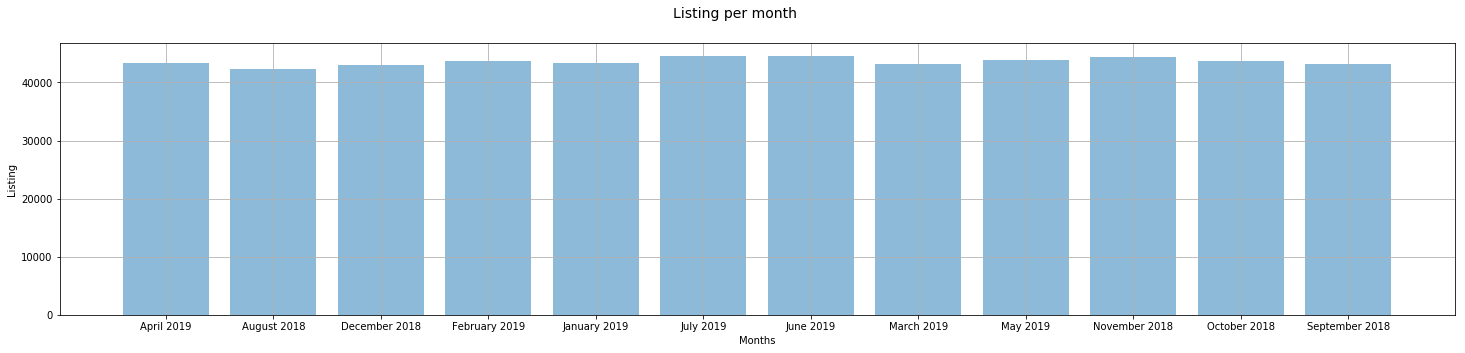

In [4]:
city.supply_month([0,0],[0,0])

## Daily price per month (Avg.)

Average daily rate: 198.97338788582906


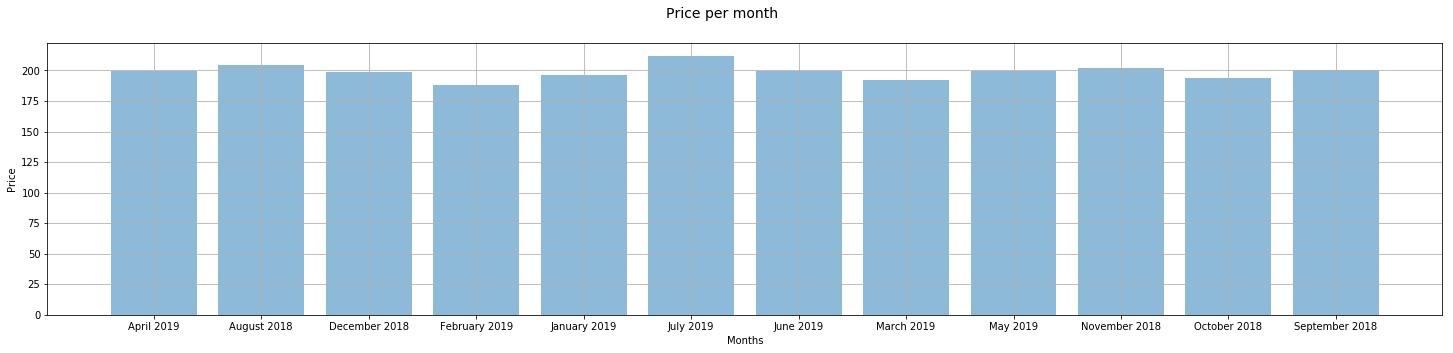

In [5]:
city.daily_rate([0,0],[0,0])
#Gráfica ordenada por mes

# Total estimated revenue in USD for bookings for 30 days or less

            Months  Estimated revenue
0       April 2019          8405442.0
1      August 2018          8445274.0
2    December 2018          8332937.0
3    February 2019          8003177.0
4     January 2019          8289907.0
5        July 2019          9185551.0
6        June 2019          8648447.0
7       March 2019          8067545.0
8         May 2019          8516112.0
9    November 2018          8771292.0
10    October 2018          8276924.0
11  September 2018          8459581.0


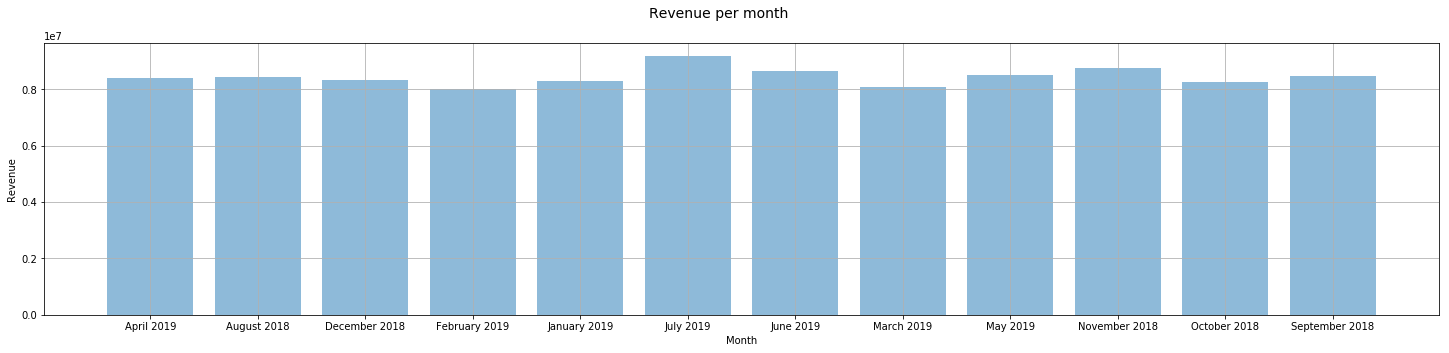

In [6]:
city.price_night([0,0],[0,0])

## Minimum nights*
#### Generar insight

In [9]:
city.bins_nights()

3.698642695605742


,Minimum nights,# of listing
0,30 days,509392
1,90 days,11471
2,More than 90 days,19


## Room Type list

In [8]:
city.room_type([0,0],[0,0])

room_type,pythrs_month,Entire home/apt,Private room,Shared room
0,April 2019,27181,14411,1782
1,August 2018,26112,14312,1892
2,December 2018,26809,14242,1949
3,February 2019,27108,14599,1954
4,January 2019,27045,14446,1844
5,July 2019,28141,14575,1854
6,June 2019,27942,14690,1845
7,March 2019,26961,14378,1791
8,May 2019,27576,14539,1779
9,November 2018,27367,15017,2079


## Bedrooms per propertie

room_type  bedrooms  Entire home/apt  Private room  Shared room
0               0.0          50329.0        6028.0         15.0
1               1.0         124292.0      160414.0      22726.0
2               2.0          85483.0        6437.0          1.0
3               3.0          38498.0        1237.0          0.0
4               4.0          16223.0         318.0          0.0
5               5.0           6955.0         144.0          0.0
6               6.0           2144.0           6.0          1.0
7               7.0           1042.0          21.0          0.0
8               8.0            237.0           7.0          0.0
9               9.0            145.0           5.0          0.0
10             10.0            105.0           6.0          0.0
11             11.0             33.0           8.0          0.0
12             12.0              2.0          12.0          0.0
13             13.0              1.0           0.0          0.0
14             15.0              1.0    

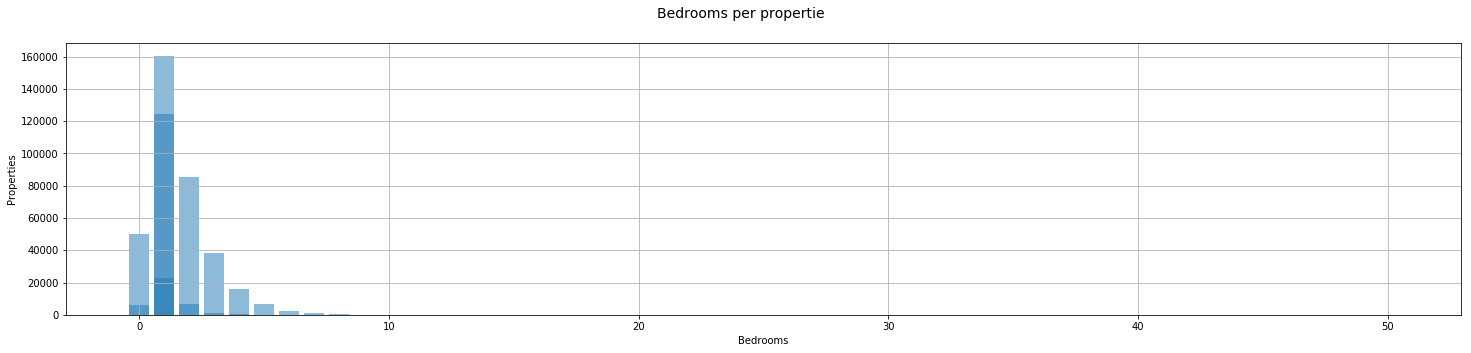

In [36]:
city.bedrooms([0,0],[0,0])
#Group by Top5

## Reviews per room type

         room_type  review_scores_rating
0  Entire home/apt             94.657516
1     Private room             94.625641
2      Shared room             89.428647


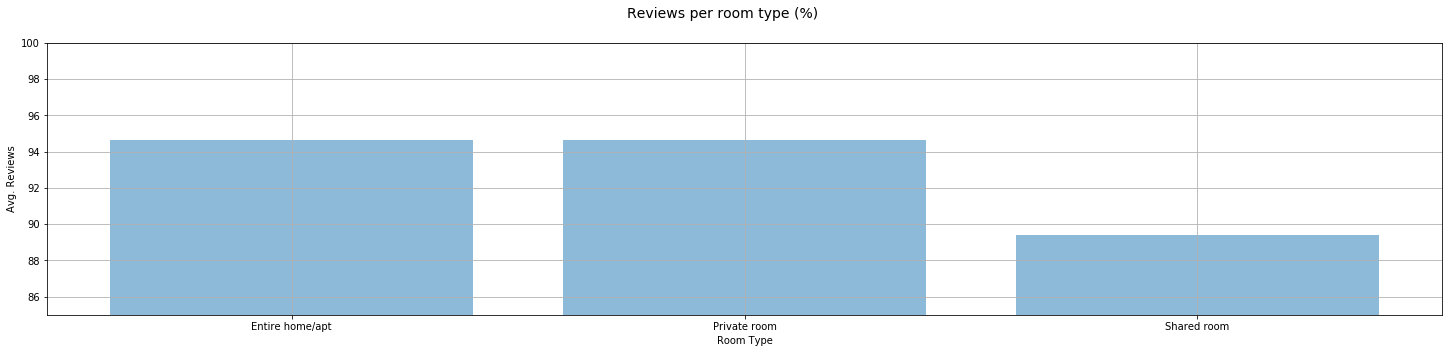

In [10]:
city.review_type_room([0,0],[85,100])

## Average Price per neighborhood (Top 5)

    neighbourhood  number      price
62      Hollywood   43094  7303569.0
89   Mid-Wilshire   39563  6369813.0
148        Venice   27860  6176901.0
36       Downtown   18237  3260585.0
79     Long Beach   17741  2332770.0


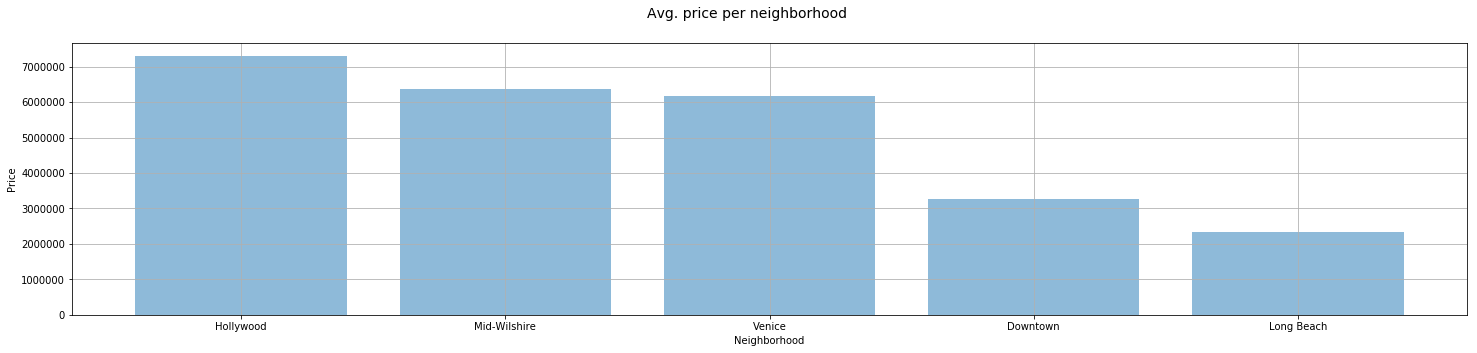

In [19]:
#Los Angeles average price per neighborhood (to get the top 5 best neighborhoods)
city.neighborhood([0,0],[0,0],'p')
#Graph (bars)

#PROCESS MORE THAN 30 neighbourhood

    neighbourhood  number  review_scores_rating
62      Hollywood   34561             3221954.0
89   Mid-Wilshire   31485             2954634.0
148        Venice   24381             2317690.0
79     Long Beach   14954             1422854.0
36       Downtown   14763             1384800.0


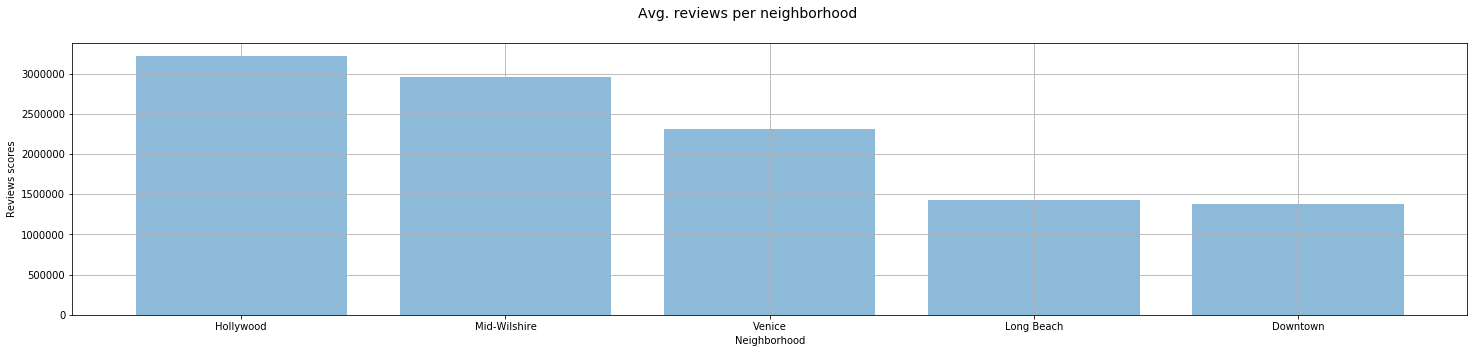

In [20]:
#Los Angeles average reviews per neighborhood (to get the top 5 best neighborhoods)
city.neighborhood([0,0],[0,0],'r')
#Graph (bars)

In [21]:
#Hipotesis nula: malos reviews con buenos reviews son las mismas
#Hipotesis alternativa: los reviews afectan al precio
#Calcular promedios de los precios con malos y buenos reviews( por debajo y encima del promedio)
#calcular promedios de los precios con buenos y malos reviews (q1 y q3)


In [22]:
#API del banco mundial para obtener salario o pib per capita y compararlo con el ingreso de airbnb mensual
#graficar

# Multiple Scatter Plots vs Price

In [16]:
def multiple_scatter_plot(plot_name, axis_x, axis_y, title, label_x, label_y):
        fig, plot_name = plt.subplots(figsize=(8,5))
        fig.suptitle(title, fontsize='14')

        plot_name.scatter(axis_x, axis_y, color='g', marker='o', edgecolors='r')

        plot_name.grid()
        plot_name.set_xlabel(label_x)
        plot_name.set_ylabel(label_y)
        plot_name.legend(loc='best')
        plt.savefig('figures/' + str(title.replace(' ','_')) + '.png')
        return plt.show()

In [17]:
numbers_df = AIRBNB_DT.select_dtypes(include=['int','float'])
numbers_df.tail(10)

,Unnamed: 0,id,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,minimum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,availability_365
523702,523702,27555994,34.054662,-118.174371,6,2.0,1.0,5.0,45.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87
523703,523703,27556031,33.763922,-118.138550,2,1.0,0.0,1.0,168.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,178
523704,523704,27556093,34.662189,-118.185963,8,3.0,3.0,1.0,56.0,1,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78
523705,523705,27557099,34.068352,-118.295265,10,2.0,2.0,6.0,194.0,8,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68
523706,523706,27558246,33.996370,-118.437909,2,1.0,1.0,1.0,30.0,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362
523707,523707,27558262,33.993760,-118.478838,2,1.0,1.0,1.0,90.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
523708,523708,27558477,34.107717,-118.064330,3,1.0,1.0,2.0,45.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360
523709,523709,27558999,34.099023,-118.319293,6,2.0,2.0,5.0,159.0,4,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,362
523710,523710,27559917,34.161666,-118.377436,3,1.0,1.0,1.0,150.0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19
523711,523711,27562682,34.106132,-118.462123,8,5.0,4.0,4.0,1900.0,1,7,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50


In [18]:
numbers_df_na = AIRBNB_DT[['host_acceptance_rate', 'accommodates','bathrooms', 'bedrooms', 'guests_included',
                          'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                          'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 
                           'maximum_nights_avg_ntm','availability_30','availability_60','availability_90',
                          'availability_365', 'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
                          'review_scores_accuracy','review_scores_cleanliness','review_scores_checkin',
                          'review_scores_communication', 'review_scores_location','review_scores_value','price',
                            'weekly_price','monthly_price']]

In [19]:
#numbers_df_na['price'] = numbers_df_na['price'].replace('[\$,]', '', regex=True).astype(float)
#numbers_df_na['weekly_price'] = numbers_df_na['weekly_price'].replace('[\$,]', '', regex=True).astype(float)
#numbers_df_na['monthly_price'] = numbers_df_na['monthly_price'].replace('[\$,]', '', regex=True).astype(float)

corr_df = AIRBNB_DT[['review_scores_rating',
                         'review_scores_accuracy',
                         'review_scores_cleanliness',
                         'review_scores_checkin',
                         'review_scores_communication',
                         'review_scores_location',
                         'review_scores_value']]

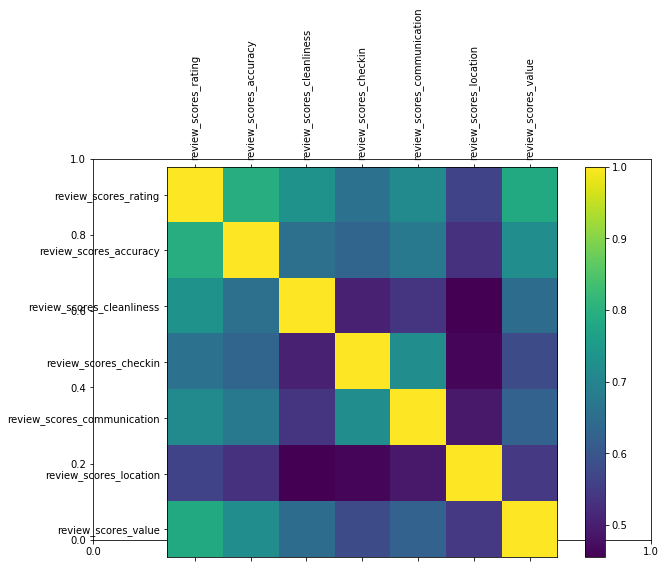

In [22]:
f, chale = plt.subplots(figsize=(10,7))
    
plt.matshow(corr_df.corr(), fignum=f.number)
plt.xticks(range(corr_df.shape[1]), corr_df.columns, fontsize=10, rotation=90)
plt.yticks(range(corr_df.shape[1]), corr_df.columns, fontsize=10)
plt.colorbar()
plt.show()

In [25]:
corr = numbers_df_na.corr()

NameError: name 'numbers_df_na' is not defined

In [54]:
#for i, col in enumerate(numbers_df_na):
#    if col != 'price':
#        multiple_scatter_plot(col, 
#                              numbers_df_na[col].fillna(0), 
#                              numbers_df_na['price'], 
#                              str(col) + ' vs price', 
#                              col, 
#                              'Price',
#                             )
#    else:
#        print('Price found it')

In [ ]:
print(stats.ttest_ind(AIRBNB_DT[AIRBNB_DT["neighbourhood"].count() >30]["price"], 
                              AIRBNB_DT["price"],
                              equal_var=False))

In [56]:
neig_30 = AIRBNB_DT.groupby('neighbourhood').agg({'price': ['count', 'sum']}}).reset_index()

In [60]:
neig_30.head()

neighbourhood price          
                count       sum
0      Alhambra  3232  284455.0
1  Alondra Park    92   12145.0
2      Altadena  2662  397169.0
3       Antibes     1    1014.0
4       Arcadia  2929  328548.0

In [58]:
neig_30.columns

MultiIndex(levels=[['price', 'neighbourhood'], ['count', 'sum', '']],
           labels=[[1, 0, 0], [2, 0, 1]])

In [50]:
neig_30.columns = ['neighbourhood', 'number', 'sum price']

In [55]:
neig_30[(neig_30.number > 30)].sort_values('number', ascending=False)

,neighbourhood,number,sum price
62,Hollywood,43158,7315796.0
89,Mid-Wilshire,39606,6374319.0
148,Venice,27885,6180881.0
36,Downtown,18249,3262552.0
79,Long Beach,17759,2334924.0
155,West Hollywood,15852,3297674.0
161,Westlake,12871,1584639.0
122,Santa Monica,11523,2251282.0
42,Echo Park,11274,1457511.0
131,South LA,10715,1110060.0


In [30]:
stats.ttest_ind(neig_30["price"],equal_var=False)

KeyError: 'price'